# TP1 - Forêt d'arbres aléatoires & compromis Bias / Variance

In [1]:
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.getcwd())

# la configuration ci-dessous évite de recharger l'ensemble du notebook lorsque l'on change une fonction externe
%load_ext autoreload
%autoreload 2

---
## Arbres aléatoires

1. **Base de donnée**

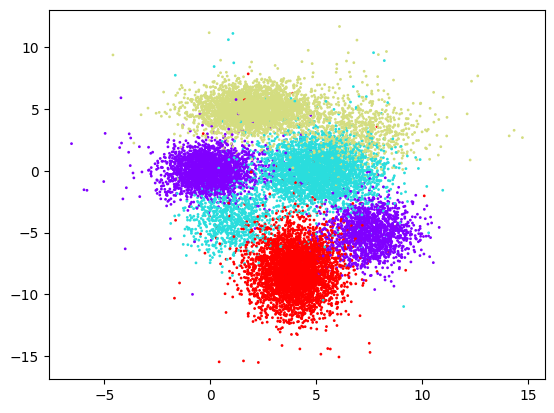

(16640, 2) (4160, 2)


In [2]:
data = np.load("TP1a.npz")
X_train, y_train, X_test, y_test = (data[key] for key in ["X_train", "y_train", "X_test", "y_test"])

plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap='rainbow');
plt.show()

print(X_train.shape, X_test.shape)

Le script ci-dessus permet de charger et visualiser les différentes classes en 2D. De plus en affichant la forme de X_train et X_test on trouve `(16640, 2) (4160, 2)`, indiquant des examples en deux dimensions avec 16640 examples d'entrainement contre 4160 en base de test (80%/20%)

2. **Arbre de decision**

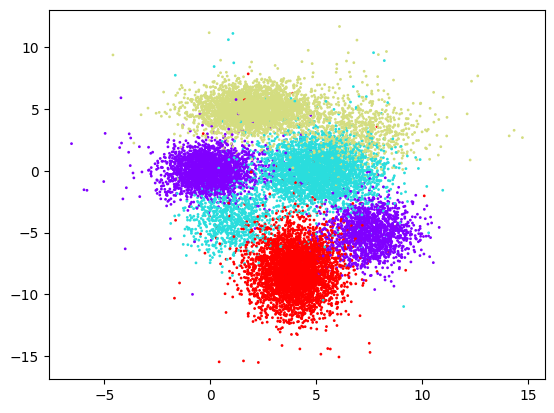

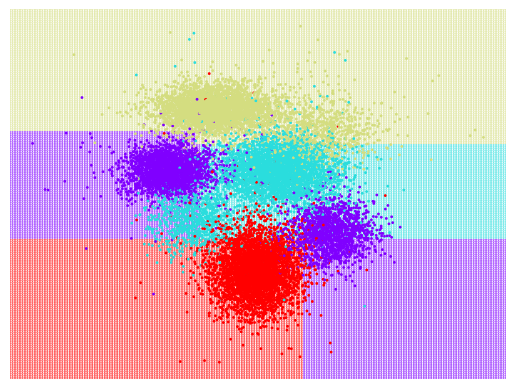

|--- feature_1 <= 2.15
|   |--- feature_1 <= -5.52
|   |   |--- feature_0 <= 6.21
|   |   |   |--- class: 4.0
|   |   |--- feature_0 >  6.21
|   |   |   |--- class: 1.0
|   |--- feature_1 >  -5.52
|   |   |--- feature_0 <= 1.44
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  1.44
|   |   |   |--- class: 2.0
|--- feature_1 >  2.15
|   |--- feature_1 <= 3.14
|   |   |--- feature_0 <= 1.14
|   |   |   |--- class: 1.0
|   |   |--- feature_0 >  1.14
|   |   |   |--- class: 3.0
|   |--- feature_1 >  3.14
|   |   |--- feature_0 <= 3.36
|   |   |   |--- class: 3.0
|   |   |--- feature_0 >  3.36
|   |   |   |--- class: 3.0

Max accuracy: 0.9303 at max_depth = 8


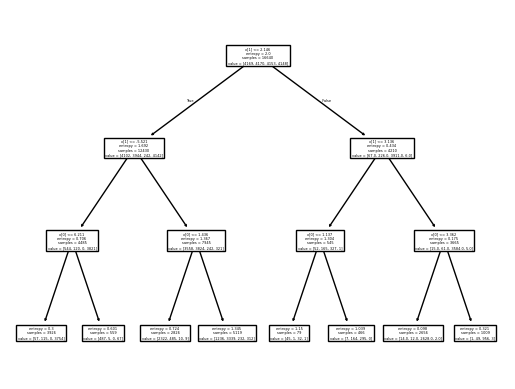

In [3]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from TP1a_ETU import visualize_classifier

accuracies = []
tree_max = None
max_acc = 0
max_depth_best = None

for i in range(3, 21):
    treei = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=8061)
    treei.fit(X_train, y_train)
    
    acc = treei.score(X_test, y_test)
    accuracies.append(acc)
    if acc > max_acc:
        max_acc = acc
        tree_max = treei
        max_depth_best = i

    # if i == 8 or i == 20:
    #     plt.figure()
    #     visualize_classifier(treei, X_train, y_train)

    if i == 3:
        visualize_classifier(treei, X_train, y_train)
        tree.plot_tree(treei)
        text_representation1 = tree.export_text(treei)
        print(text_representation1)

print(f"Max accuracy: {max_acc:.4f} at max_depth = {max_depth_best}")

On constate que `max_depth`est la profondeur de l'arbre, soit le nombre de discriminateur binaire maximum pour atteindre une feuille.  
`visualize_classifier` permet de mapper le découpage en zones de classe induite par l'arbre. Quant à `tree.plot_tree` et `tree.export_text`, ils montrent tous deux la structure de l'arbre, avec pour chaques neuds les paramètres importants

In [4]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = tree_max.predict(X_test)

C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       0.93      0.94      0.93      1031
         2.0       0.89      0.88      0.88      1030
         3.0       0.94      0.94      0.94      1047
         4.0       0.96      0.96      0.96      1052

    accuracy                           0.93      4160
   macro avg       0.93      0.93      0.93      4160
weighted avg       0.93      0.93      0.93      4160

Accuracy: 0.9302884615384616


Les valeures obtenue représentent:
- **précision**: proportion de prédictions positives correctes parmi toutes les prédictions positives.  
$precision_i = \frac{TP_i}{TP_i + FP_i}$

- **rappel**: proportion de vrais positifs détectés parmi tous les vrais positifs.  
$recall_i = \frac{TP_i}{TP_i + FN_i}$ 

- **F1-score**: moyenne harmonique de la précision et du rappel, équilibrant les deux mesures.  
$f1score_i = 2 \cdot \frac{precision_i \cdot recall_i}{precision_i + recall_i}$

D'où:

$precision_1 = \frac{TP_1}{TP_1 + FP_1} = \frac{680}{680 + 139} \approx 0.83$

$recall_1 = \frac{TP_1}{TP_1 + FN_1} = \frac{680}{680 + 351} \approx 0.66$

$F1_1 = 2 \cdot \frac{precision_1 \cdot recall_1}{precision_1 + recall_1} 
     = 2 \cdot \frac{0.83 \cdot 0.66}{0.83 + 0.66} \approx 0.73$

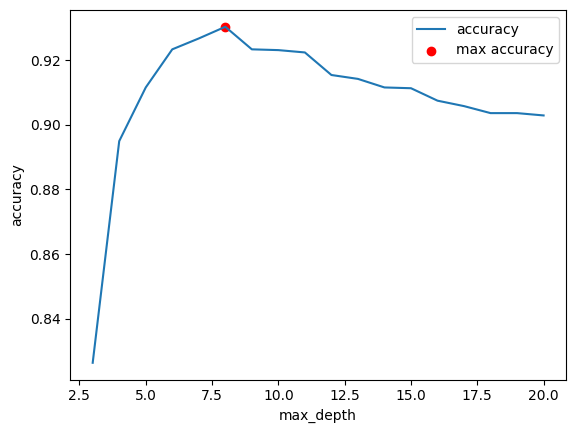

In [5]:
plt.figure()
plt.plot(range(3, 21), accuracies, label='accuracy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.scatter(max_depth_best, max_acc, color='red', label='max accuracy')  # highlight max
plt.legend()
plt.show()

On remarque que bien qu'initialement la précision augmente avec la profondeur de l'arbre, au bout d'un certain rang la précision diminue au contraire. En effet, il s'agit d'un exemple d'overfitting, où l'arbre est bien trop habitué aux données d'entrainement. Trop sensible aux outliers etc.

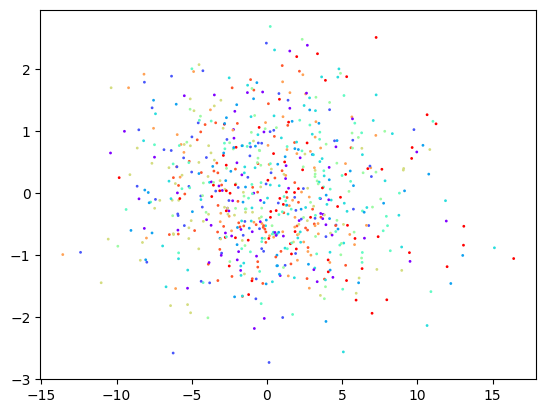

(700, 100) (300, 100)


In [ ]:
data = np.load("TP1b.npz")
X_train, y_train, X_test, y_test = (data[key] for key in ["X_train", "y_train", "X_test", "y_test"])

plt.show()
print(X_train.shape, X_test.shape)

---
## Forêt d'arbres aléatoire

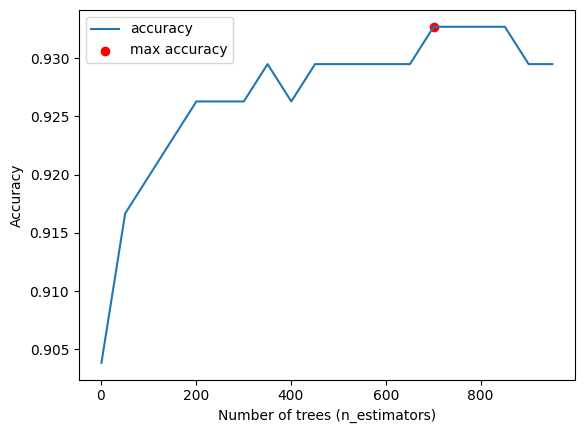

Best compromise accuracy/n_tree: 0.9327 at n_estimators = 701


In [13]:
from sklearn.ensemble import RandomForestClassifier

accuracies_rf = []
rf_max_acc = 0
rf_max_n = None
rf_best_model = None
epsilon = 1e-3

test_range = range(1, 1000, 50)

for n_trees in test_range:
    RFi = RandomForestClassifier(criterion='entropy', n_estimators=n_trees, random_state=61, max_depth=5)
    RFi.fit(X_train, y_train.ravel())
    acc = RFi.score(X_test, y_test)
    accuracies_rf.append(acc)
    
    # Track the best RF model
    if acc > rf_max_acc + epsilon:
        rf_max_acc = acc
        rf_max_n = n_trees
        rf_best_model = RFi

# Plot accuracy vs number of trees
plt.figure()
plt.plot(test_range, accuracies_rf, label='accuracy')
plt.xlabel('Number of trees (n_estimators)')
plt.ylabel('Accuracy')
plt.scatter(rf_max_n, rf_max_acc, color='red', label='max accuracy')  # highlight max
plt.legend()
plt.show()

print(f"Best compromise accuracy/n_tree: {rf_max_acc:.4f} at n_estimators = {rf_max_n}")


In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

y_pred = rf_best_model.predict(X_test)
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.96      0.94        78
         1.0       0.87      0.91      0.89        78
         2.0       0.99      0.88      0.93        78
         3.0       0.97      0.97      0.97        78

    accuracy                           0.93       312
   macro avg       0.94      0.93      0.93       312
weighted avg       0.94      0.93      0.93       312

Accuracy: 0.9326923076923077


In [23]:
from sklearn.model_selection import GridSearchCV

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=61),
    param_grid={
        'n_estimators': [1, 2, 4, 8, 16, 32, 38,39,40, 64],
        'max_depth': [1, 2, 4, 8,9,10, 12, 16, 32]
    }
)

grid_search_rf.fit(X_train, y_train.ravel())
print(grid_search_rf.best_params_)

y_pred = grid_search_rf.best_estimator_.predict(X_test)
C=confusion_matrix(y_test, y_pred)
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

{'max_depth': 9, 'n_estimators': 39}
              precision    recall  f1-score   support

         0.0       0.92      0.97      0.94        78
         1.0       0.91      0.88      0.90        78
         2.0       0.99      0.92      0.95        78
         3.0       0.95      0.97      0.96        78

    accuracy                           0.94       312
   macro avg       0.94      0.94      0.94       312
weighted avg       0.94      0.94      0.94       312

Accuracy: 0.9391025641025641


---
### 2 - Biais / Variance dilema

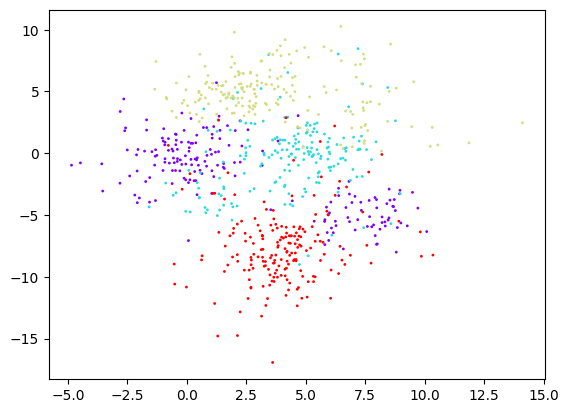

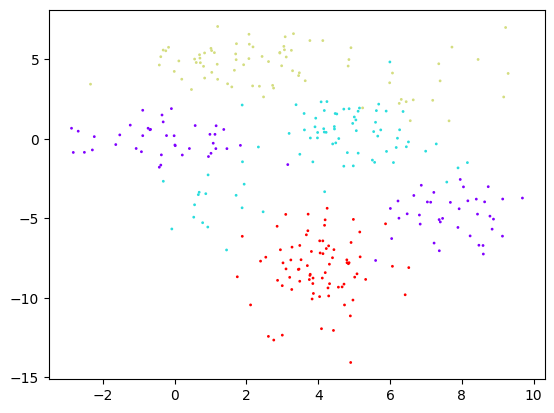

(748, 2) (312, 2)


In [10]:
data = np.load("TP1c.npz")
X_train, y_train, X_test, y_test = (data[key] for key in ["X_train", "y_train", "X_test", "y_test"])
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=1, cmap='rainbow');
plt.show()
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, s=1, cmap='rainbow');
plt.show()

print(X_train.shape, X_test.shape)
# print(y_train.shape, y_test.shape)

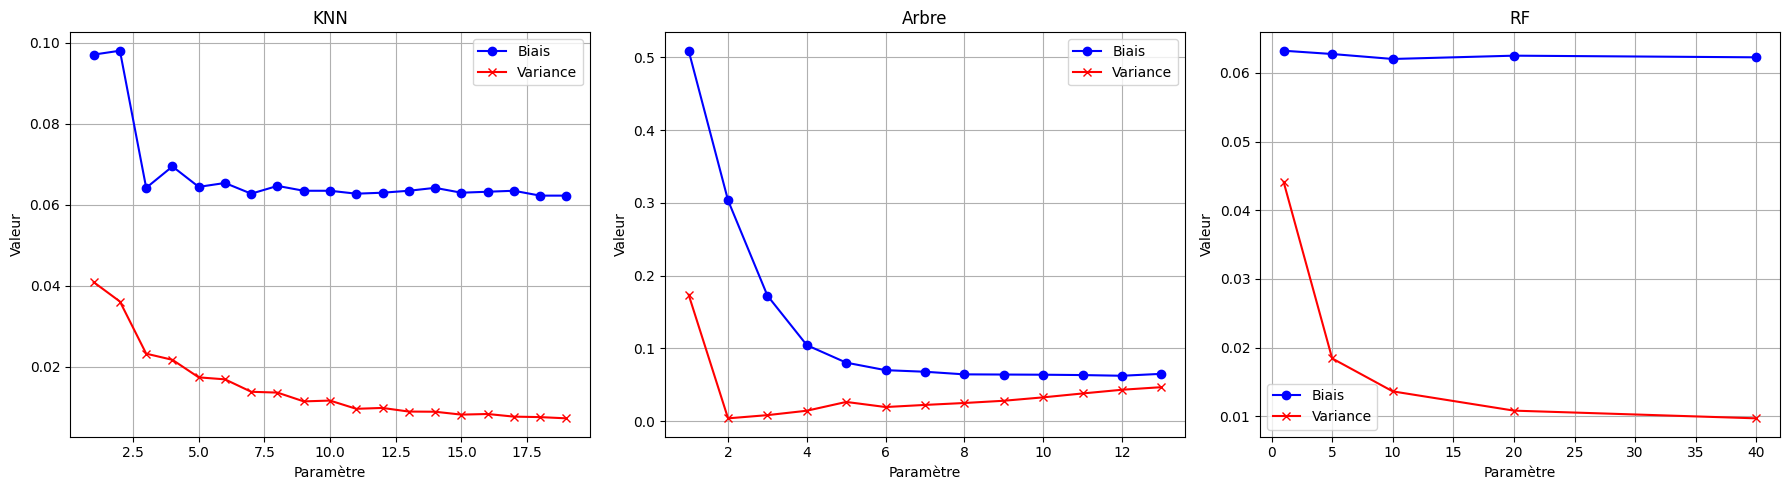

In [ ]:
import matplotlib.pyplot as plt
from TP1a_ETU import predict_multiple, get_results

Nrun = 30
proportion = 0.6

# range de parametres
knn_k_values = range(1, 20)
tree_depth_values = range(1, 14)
rf_n_estimators_values = [1, 5, 10, 20, 40]

# dictionnaire pour ranger les résultats
results = {
    'KNN': {'param': knn_k_values, 'biais': [], 'variance': [], "label": "Nombre de voisins"},
    'Arbre': {'param': tree_depth_values, 'biais': [], 'variance': [], "label": "Profondeur maximum"},
    'RF': {'param': rf_n_estimators_values, 'biais': [], 'variance': [], "label": "Nombre d'arbres"}
}

# Prédiction et calcul de biais/variance pour chacuns
for k in knn_k_values:
    preds = predict_multiple(Nrun, proportion, model_type='knn', k=k)
    biais, variance = get_results(Nrun, preds)
    results['KNN']['biais'].append(biais)
    results['KNN']['variance'].append(variance)

for depth in tree_depth_values:
    preds = predict_multiple(Nrun, proportion, model_type='tree', k=depth)
    biais, variance = get_results(Nrun, preds)
    results['Arbre']['biais'].append(biais)
    results['Arbre']['variance'].append(variance)

for n in rf_n_estimators_values:
    preds = predict_multiple(Nrun, proportion, model_type='rf', k=n)
    biais, variance = get_results(Nrun, preds)
    results['RF']['biais'].append(biais)
    results['RF']['variance'].append(variance)

# visualisation des résultats
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for ax, method in zip(axes, ['KNN', 'Arbre', 'RF']):
    param = results[method]['param']
    ax.plot(param, results[method]['biais'], label='Biais', color='blue', marker='o')
    ax.plot(param, results[method]['variance'], label='Variance', color='red', marker='x')
    ax.set_xlabel('Paramètre')
    ax.set_ylabel('Valeur')
    ax.set_title(method)
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
